In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
# Reading the dataset to the python environment
data=pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [3]:
# Replacing ‘PassengerId’ as the index column
data=pd.read_csv('titanic_dataset.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [4]:
# Checking the shape of the dataset
data.shape

(891, 11)

In [5]:
# Checking for unique values in each column
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [6]:
# Checking some more detailed information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
# Checking for null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# Checking the datatypes
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# 4. Fill in all the missing values present in all the columns in the dataset

In [9]:
# Dropping the column 'Cabin'
data.drop('Cabin',axis=1,inplace=True)

It only have information for 204 out of 991 passengers.Therefore dropping the whole column with the method drop.

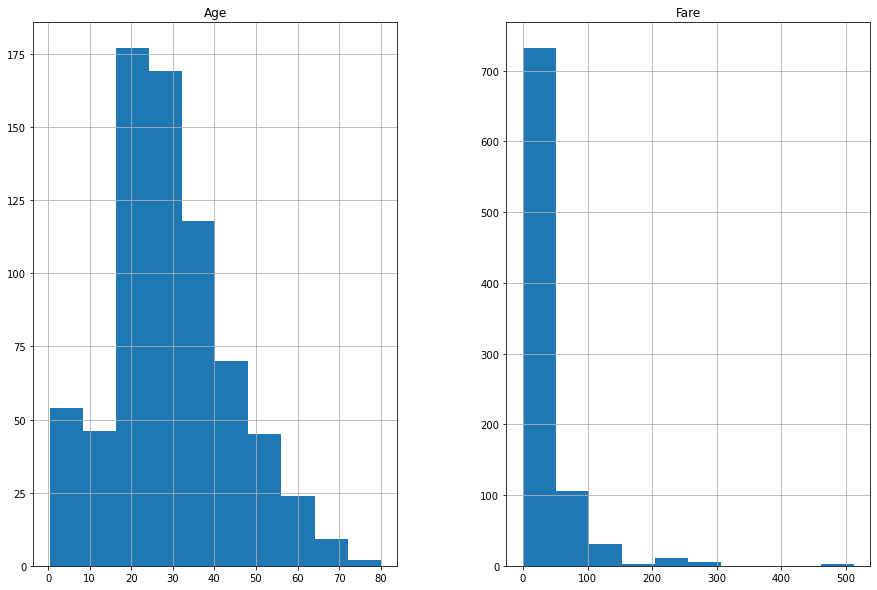

In [10]:
# Plotting the frequency graph
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,10))
plt.show()

In [11]:
# Filling the missing values using for loop
for i in ['Age' ]:
    data[i] = data[i].fillna(data[i].mean())

Filling the missing values with the fillna method in the Age column with the mean age of all passengers.

Text(0, 0.5, 'Count')

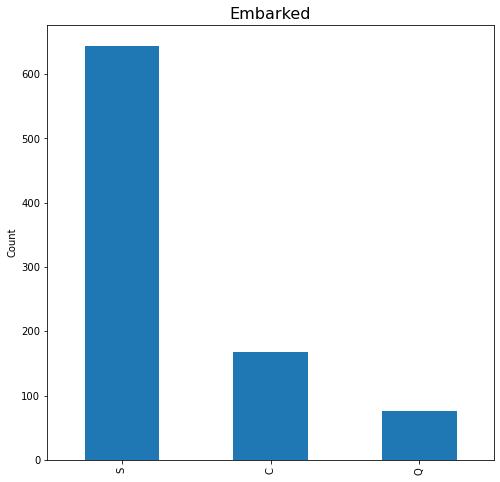

In [12]:
# Plotting the countplot of 'Embarked'
data['Embarked'].value_counts().plot(kind='bar',
                                         figsize=(8,8))
plt.title('Embarked',fontsize=16)
plt.ylabel('Count')

In [13]:
# Dropping the rows with null values
data1 = data.dropna(axis=0)
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [14]:
# Checking for null values
data1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

### 5.1. Outlier detection of column 'Age'

Text(0.5, 1.0, 'Box plot of Age')

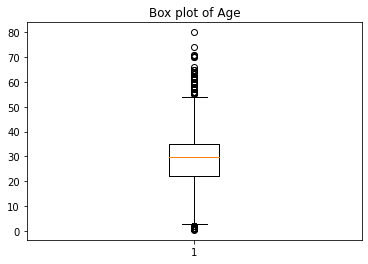

In [15]:
# Plotting the Box plot of Age
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [16]:
# Calculating quantiles
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')

In [17]:
# Printing quantile values
print(Q1)
print(Q2)
print(Q3)

22.0
29.69911764705882
35.0


In [18]:
# Calculating lower limit and upper limit
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [19]:
# Printing lower limit and upper limit 
print(low_limit)
print(up_limit)

2.5
54.5


In [20]:
# Calculating outliers using for loop
outlier = []
for x in data['Age']:
    if ((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [21]:
# Displaying outliers
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [22]:
# Getting the index locations of outliers
ind1 = data['Age']>up_limit
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [23]:
# Dropping outliers
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880], inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

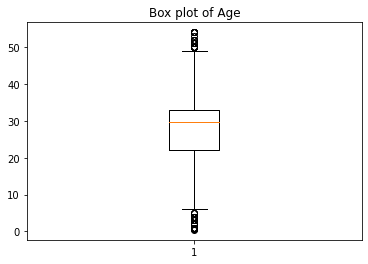

In [24]:
# Plotting the Box plot of Age
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

### 5.2. Outlier detection of column 'Fare'

Text(0.5, 1.0, 'Box plot of Fare')

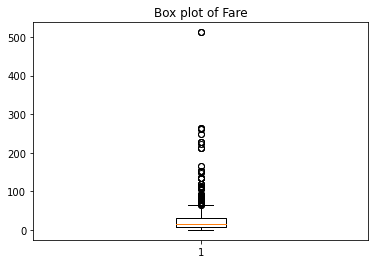

In [25]:
# Plotting the Box plot of Fare
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [26]:
# Calculating quantiles
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')

# Calculating lower limit and upper limit
IQR = Q3-Q1

low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [27]:
# Calculating outliers using for loop
outlier = []
for x in data['Fare']:
    if ((x>up_limit) or (x<low_limit)):
        outlier.append(x)
        
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [28]:
# Getting the index locations of outliers
ind1 = data['Fare']>up_limit
index = data.loc[ind1].index
index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=108)

In [29]:
# Dropping outliers
data.drop([ 121, 125, 140, 152, 160, 181, 202, 216, 219, 225, 231, 246, 257,
            258, 259, 263, 270, 291, 292, 298, 300, 306, 307, 308, 311, 312,
            319, 320, 325, 326, 333, 335, 337, 338, 342, 370, 374, 376, 378,
            381, 386, 391, 394, 413, 436, 446, 454, 485, 487, 497, 499, 505,
            506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 592, 610,
            616, 628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709,
            717, 731, 738, 742, 743, 755, 760, 764, 766],
           inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

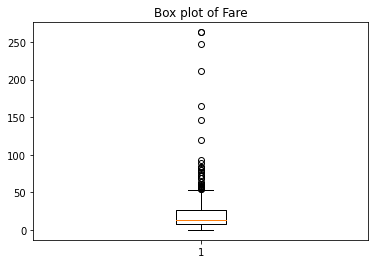

In [30]:
# Plotting the Box plot of Fare
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

### 5.3. Outlier detection of column 'SibSp'

Text(0.5, 1.0, 'Box plot of SibSp')

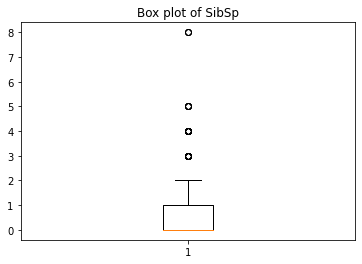

In [31]:
# Plotting the Box plot of SibSp
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [32]:
# Calculating quantiles
Q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')

IQR = Q3-Q1

low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [33]:
# Calculating outliers using for loop
outlier = []
for x in data['SibSp']:
    if ((x>up_limit) or (x<low_limit)):
        outlier.append(x)
        
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [34]:
# Getting the index locations of outliers
ind1 = data['SibSp']>up_limit
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 165,
            172, 177, 183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486,
            542, 543, 635, 643, 684, 687, 727, 788, 793, 814, 820, 825, 847,
            851, 864],
           dtype='int64', name='PassengerId')

In [35]:
# Dropping outliers
data.drop([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

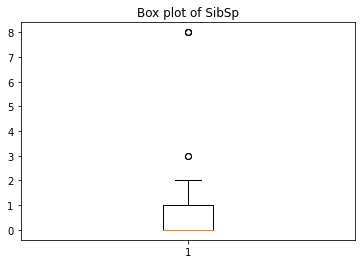

In [36]:
# Plotting the Box plot of SibSp
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

<AxesSubplot:>

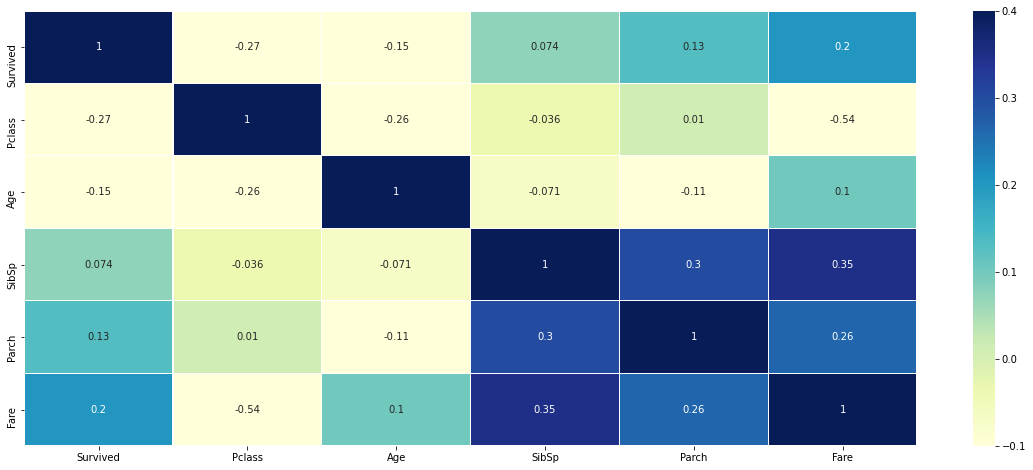

In [37]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.1, vmax=0.4, annot=True, linewidths=0.2, cmap='YlGnBu')

In [38]:
y = data['Survived']
X = data.drop(['Name','Sex', 'Ticket', 'Embarked', 'Survived'], axis=1)

In [39]:
# Importing training test split from SciKit-Learn
from sklearn.model_selection import train_test_split
# Setting up training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Importing linear model from SciKit-Learn
from sklearn import linear_model
# Training model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

# Calculating mean squared error
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

# Calculating R squared value
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,predictions))

MSE is: 0.19811896541539353
R squared value is : 0.12018669441780638


### Min max scaling

In [40]:
# Dropping the columns with strings
X = data.drop(['Name','Sex', 'Ticket', 'Embarked', 'Survived'], axis=1)

In [41]:
# Statistical summary of X
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,726.000000,726.000000,726.000000,726.000000,726.000000
mean,2.458678,28.624251,0.330579,0.308540,19.757684
std,0.746726,10.308202,0.726504,0.770926,24.376263
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,29.699118,0.000000,0.000000,12.281250
75%,3.000000,33.000000,1.000000,0.000000,26.000000
max,3.000000,54.000000,8.000000,6.000000,263.000000


In [42]:
# Importing preprocessing for min max scaling
from sklearn import preprocessing

min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)

# Converting X into a Dataframe
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4
count,726.000000,726.000000,726.000000,726.000000,726.000000
mean,0.729339,0.526395,0.041322,0.051423,0.075124
std,0.373363,0.192389,0.090813,0.128488,0.092685
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.421426,0.000000,0.000000,0.030022
50%,1.000000,0.546456,0.000000,0.000000,0.046697
75%,1.000000,0.608063,0.125000,0.000000,0.098859
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is :', r2_score(y_test,predictions))

MSE is: 0.19811896541539356
R squared value is : 0.12018669441780627


The MSE and R squared value is same. Therefore Min Max scaling does not have any effect in the data.